In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
sns.set(style="whitegrid")


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

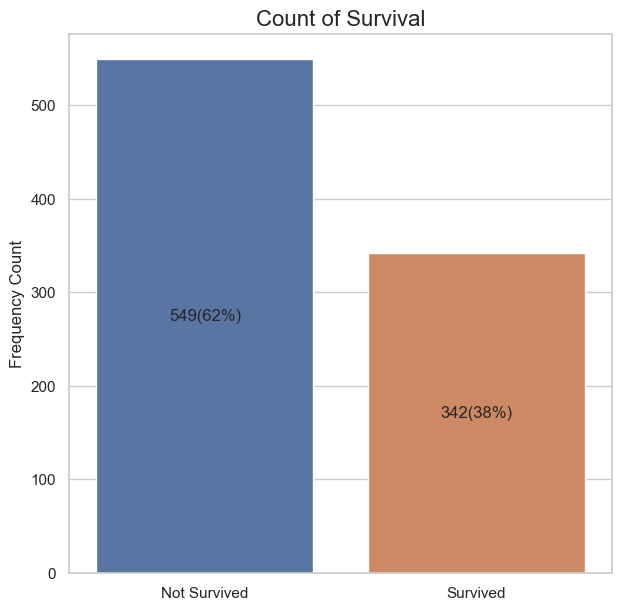

In [5]:
figure, survive_bar = plt.subplots(figsize=(7, 7))
sns.barplot(x= train["Survived"].value_counts().index, y = train["Survived"].value_counts(), ax = survive_bar)
survive_bar.set_xticklabels(['Not Survived', 'Survived'])
survive_bar.set_ylabel('Frequency Count')
survive_bar.set_title('Count of Survival', fontsize = 16)

for patch in survive_bar.patches:
    label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
    label_y = patch.get_y() + patch.get_height()/2
    survive_bar.text(label_x, label_y,
                #left - freq below - rel freq wrt population as a percentage
               str(int(patch.get_height())) + '(' +
               '{:.0%}'.format(patch.get_height()/len(train.Survived))+')',
               horizontalalignment='center', verticalalignment='center')


In [6]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

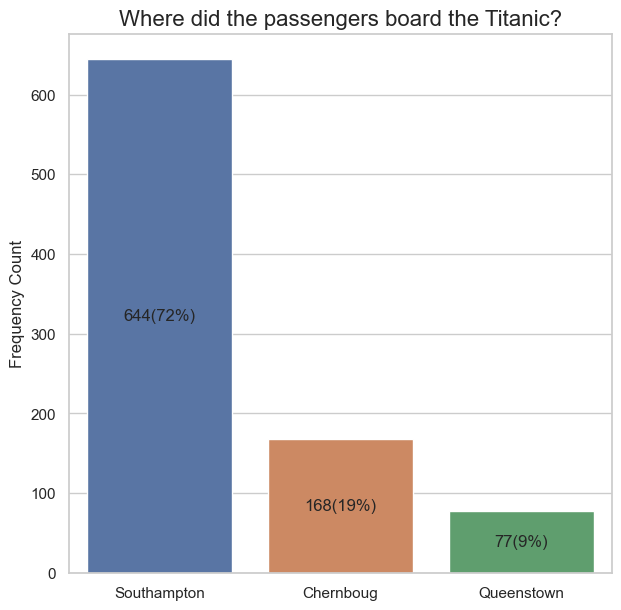

In [7]:
figure, embarked_bar = plt.subplots(figsize=(7, 7))
sns.barplot(x= train["Embarked"].value_counts().index, y = train["Embarked"].value_counts(), ax = embarked_bar)
embarked_bar.set_xticklabels(['Southampton', 'Chernboug', 'Queenstown'])
embarked_bar.set_ylabel('Frequency Count')
embarked_bar.set_title('Where did the passengers board the Titanic?', fontsize = 16)
for patch in embarked_bar.patches:
    label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
    label_y = patch.get_y() + patch.get_height()/2
    embarked_bar.text(label_x, label_y,
                #left - freq below - rel freq wrt population as a percentage
               str(int(patch.get_height())) + '(' +
               '{:.0%}'.format(patch.get_height()/len(train.Embarked))+')',
               horizontalalignment='center', verticalalignment='center')

In [8]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

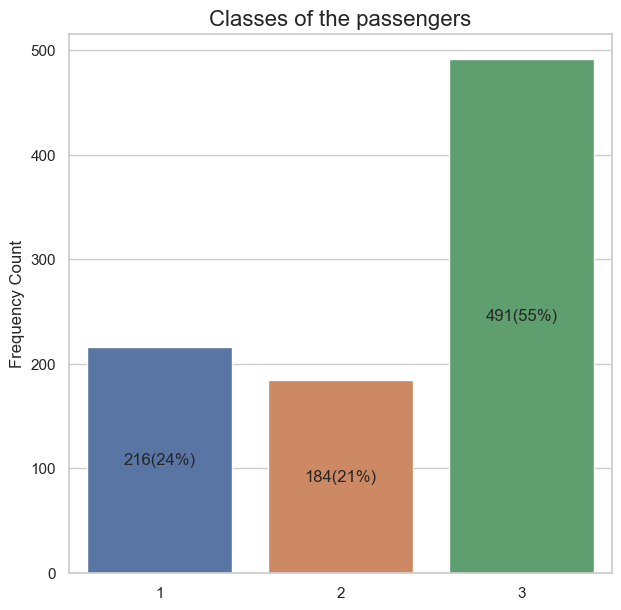

In [9]:
figure, Pclass_bar = plt.subplots(figsize=(7, 7))
sns.barplot(x= train["Pclass"].value_counts().index, y = train["Pclass"].value_counts(), ax = Pclass_bar)
Pclass_bar.set_xticklabels(['1', '2', '3'])
Pclass_bar.set_ylabel('Frequency Count')
Pclass_bar.set_title('Classes of the passengers', fontsize = 16)
for patch in Pclass_bar.patches:
    label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
    label_y = patch.get_y() + patch.get_height()/2
    Pclass_bar.text(label_x, label_y,
                #left - freq below - rel freq wrt population as a percentage
               str(int(patch.get_height())) + '(' +
               '{:.0%}'.format(patch.get_height()/len(train.Pclass))+')',
               horizontalalignment='center', verticalalignment='center')

In [10]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

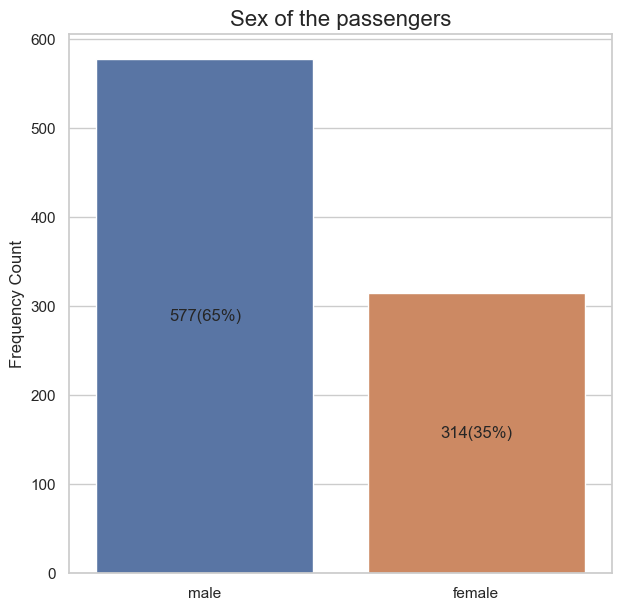

In [11]:
figure, Sex_bar = plt.subplots(figsize=(7, 7))
sns.barplot(x= train["Sex"].value_counts().index, y = train["Sex"].value_counts(), ax = Sex_bar)
Sex_bar.set_xticklabels(['male', 'female'])
Sex_bar.set_ylabel('Frequency Count')
Sex_bar.set_title('Sex of the passengers', fontsize = 16)
for patch in Sex_bar.patches:
    label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
    label_y = patch.get_y() + patch.get_height()/2
    Sex_bar.text(label_x, label_y,
                #left - freq below - rel freq wrt population as a percentage
               str(int(patch.get_height())) + '(' +
               '{:.0%}'.format(patch.get_height()/len(train.Sex))+')',
               horizontalalignment='center', verticalalignment='center')

In [12]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

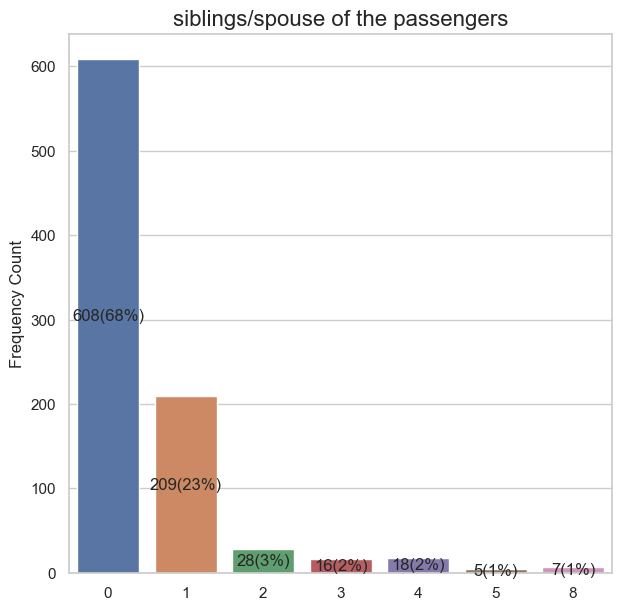

In [13]:
figure, SibSp_bar = plt.subplots(figsize=(7, 7))
sns.barplot(x= train["SibSp"].value_counts().index, y = train["SibSp"].value_counts(), ax = SibSp_bar)
SibSp_bar.set_xticklabels(['0', '1', '2', '3', '4', '5', '8'])
SibSp_bar.set_ylabel('Frequency Count')
SibSp_bar.set_title('siblings/spouse of the passengers', fontsize = 16)
for patch in SibSp_bar.patches:
    label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
    label_y = patch.get_y() + patch.get_height()/2
    SibSp_bar.text(label_x, label_y,
                #left - freq below - rel freq wrt population as a percentage
               str(int(patch.get_height())) + '(' +
               '{:.0%}'.format(patch.get_height()/len(train.SibSp))+')',
               horizontalalignment='center', verticalalignment='center')

In [14]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

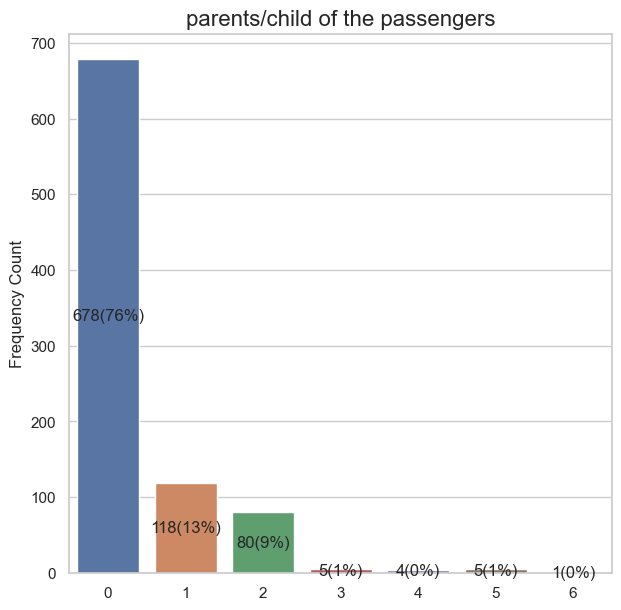

In [15]:
# you will change 9 times the name of features
figure, Parch_bar = plt.subplots(figsize=(7, 7))
sns.barplot(x= train["Parch"].value_counts().index, y = train["Parch"].value_counts(), ax = Parch_bar)
Parch_bar.set_xticklabels(['0', '1', '2', '3', '4', '5', '6'])
Parch_bar.set_ylabel('Frequency Count')
Parch_bar.set_title('parents/child of the passengers', fontsize = 16)
for patch in Parch_bar.patches:
    label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
    label_y = patch.get_y() + patch.get_height()/2
    Parch_bar.text(label_x, label_y,
                #left - freq below - rel freq wrt population as a percentage
               str(int(patch.get_height())) + '(' +
               '{:.0%}'.format(patch.get_height()/len(train.Parch))+')',
               horizontalalignment='center', verticalalignment='center')

In [16]:
train.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [17]:
train.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [18]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [19]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [20]:
def print_percentage(df,col_name,col_values):
    for x in col_values:
        group = df.loc[df[col_name]==x]
        print ('{0} survival rate: {1:.3f}'.format(x, (group['Survived'].sum()/group.shape[0])))

In [21]:
print_percentage(train,'Sex',['male', 'female'])

male survival rate: 0.189
female survival rate: 0.742


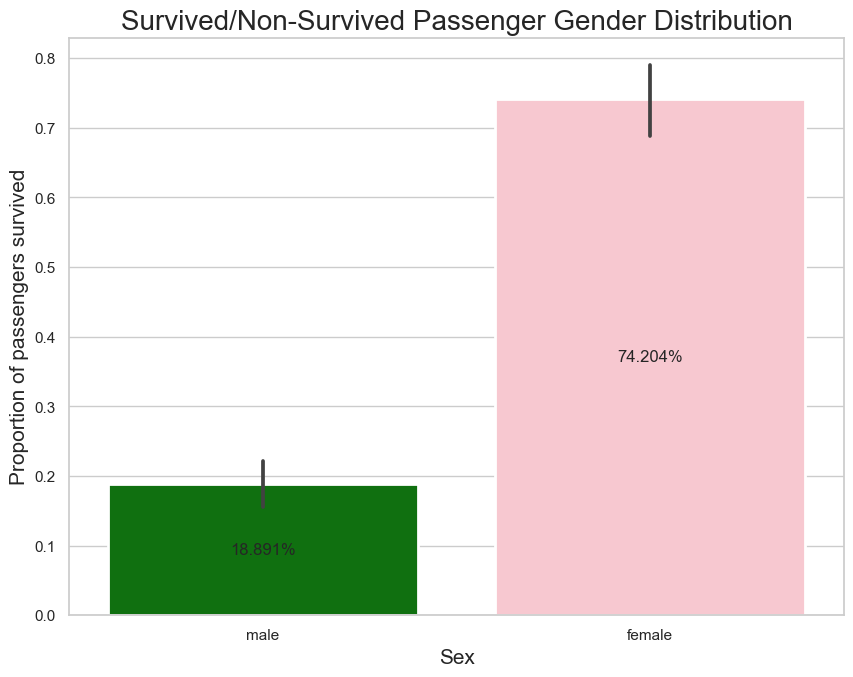

In [22]:
figure, myaxis = plt.subplots(figsize=(10, 7.5))


sns.barplot(x = "Sex", 
            y = "Survived", 
            data=train, 
            ax = myaxis,
            estimator = np.mean,
            palette = {'male':"green", 'female':"Pink"},
            linewidth=2)
#islam_comment_i think estimator parameter has no importance in this case
myaxis.set_title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 20)
myaxis.set_xlabel("Sex",fontsize = 15)
myaxis.set_ylabel("Proportion of passengers survived", fontsize = 15)

for patch in myaxis.patches:
    label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
    label_y = patch.get_y() + patch.get_height()/2
    myaxis.text(label_x, label_y,
                #left - freq below - rel freq wrt population as a percentage
                '{:.3%}'.format(patch.get_height()),
               horizontalalignment='center', verticalalignment='center')


we shall plot the survival distribution within each gender

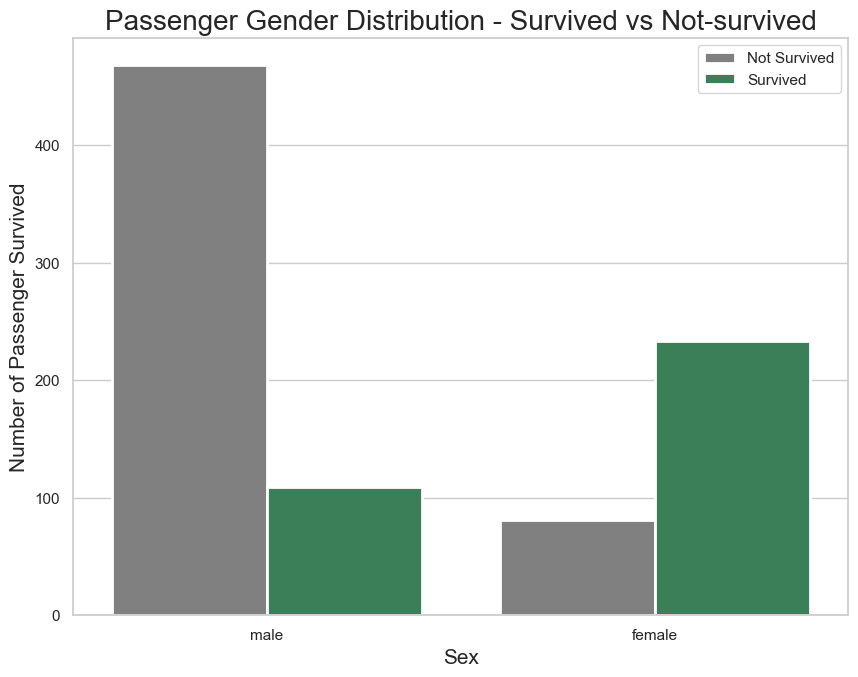

In [23]:
figure, myaxis = plt.subplots(figsize=(10, 7.5))

sns.countplot(x = "Sex", 
                   hue="Survived",
                   data = train, 
                   linewidth=2, 
                   palette = {1:"seagreen", 0:"gray"}, ax = myaxis)


## Fixing title, xlabel and ylabel
myaxis.set_title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 20)
myaxis.set_xlabel("Sex", fontsize = 15);
myaxis.set_ylabel("Number of Passenger Survived", fontsize = 15)
myaxis.legend(["Not Survived", "Survived"], loc = 'upper right')


In [24]:
print_percentage(train,'Pclass',[1,2,3])

1 survival rate: 0.630
2 survival rate: 0.473
3 survival rate: 0.242


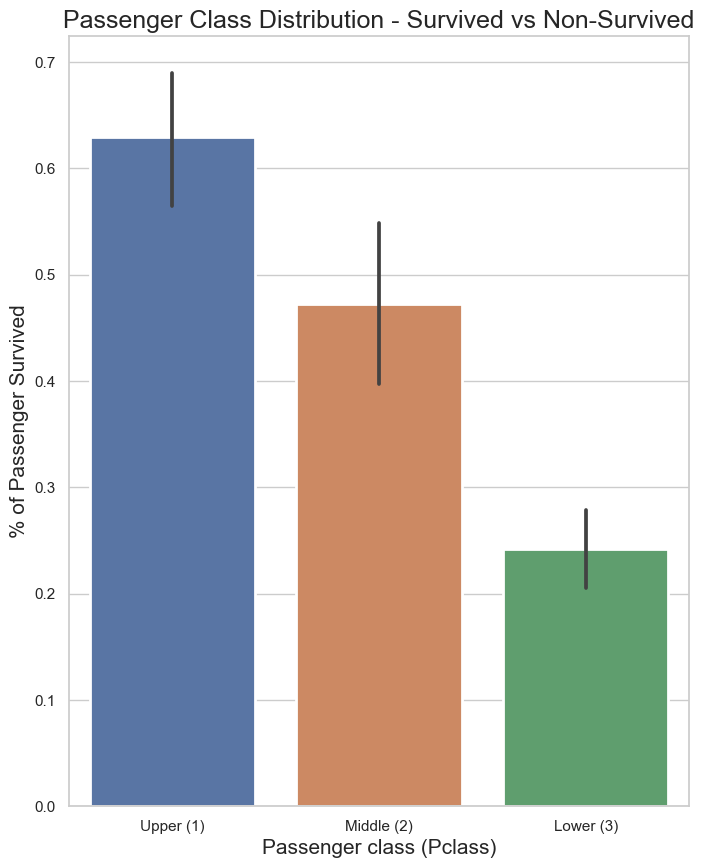

In [25]:
figure, pclass_bar = plt.subplots(figsize = (8,10))
sns.barplot(x = "Pclass", 
            y = "Survived", 
            estimator = np.mean,
            data=train, 
            ax = pclass_bar,
            linewidth=2)
pclass_bar.set_title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 18)
pclass_bar.set_xlabel("Passenger class (Pclass)", fontsize = 15);
pclass_bar.set_ylabel("% of Passenger Survived", fontsize = 15);
labels = ['Upper (1)', 'Middle (2)', 'Lower (3)']
#val = sorted(train.Pclass.unique())
val = [0,1,2] ## this is just a temporary trick to get the label right. 
pclass_bar.set_xticklabels(labels);

In [26]:
print_percentage(train,'Embarked',['S','C','Q'])

S survival rate: 0.337
C survival rate: 0.554
Q survival rate: 0.390


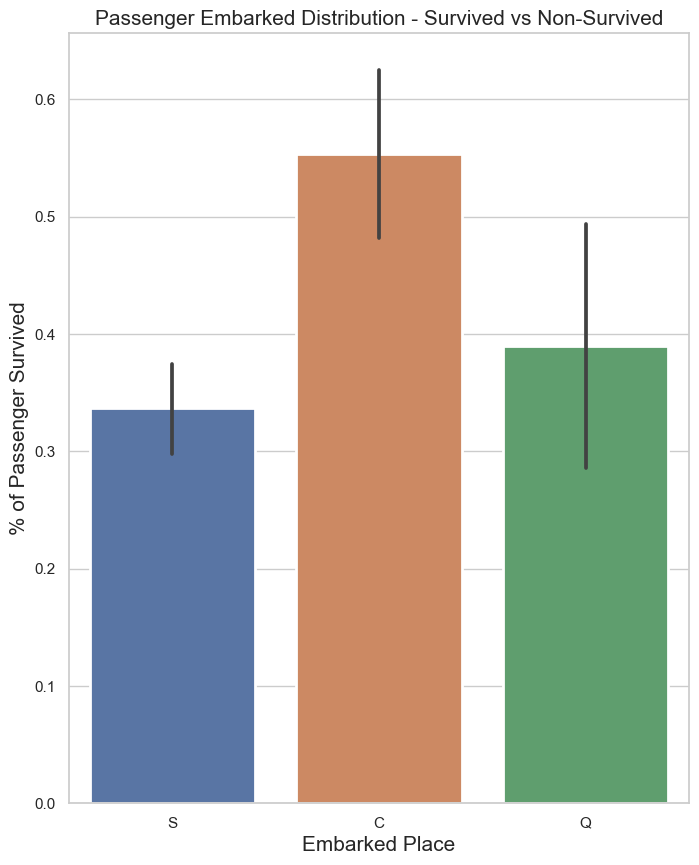

In [27]:
figure, embarked_bar = plt.subplots(figsize = (8,10))
sns.barplot(x = "Embarked", 
            y = "Survived", 
            estimator = np.mean,
            data=train, 
            ax = embarked_bar,
            linewidth=2)
embarked_bar.set_title("Passenger Embarked Distribution - Survived vs Non-Survived", fontsize = 15)
embarked_bar.set_xlabel("Embarked Place", fontsize = 15);
embarked_bar.set_ylabel("% of Passenger Survived", fontsize = 15);

In [28]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [29]:
print_percentage(train,'Parch',[0,1,2,3,4,5,6])

0 survival rate: 0.344
1 survival rate: 0.551
2 survival rate: 0.500
3 survival rate: 0.600
4 survival rate: 0.000
5 survival rate: 0.200
6 survival rate: 0.000


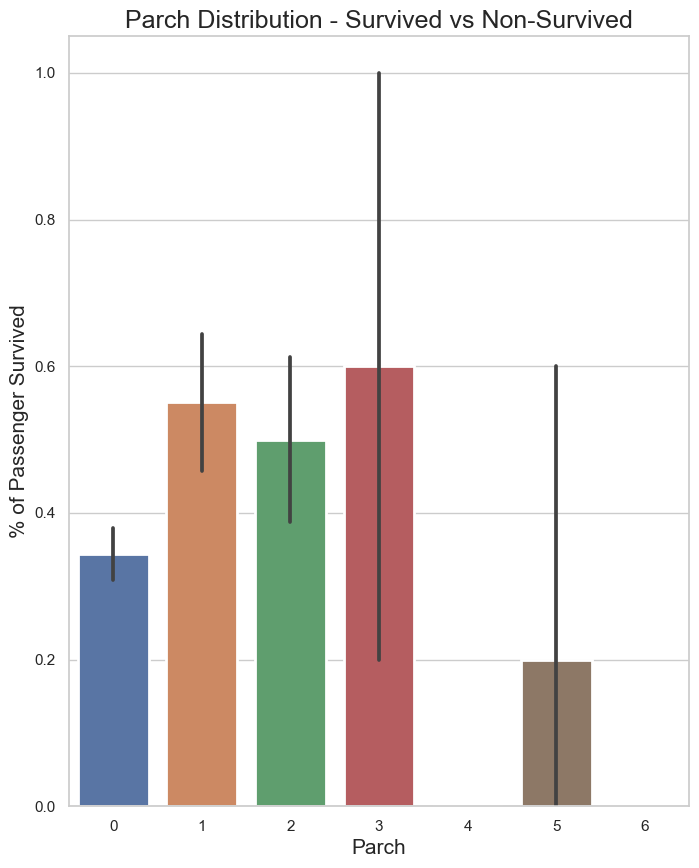

In [30]:
figure, parch_bar = plt.subplots(figsize = (8,10))
sns.barplot(x = "Parch", 
            y = "Survived", 
            estimator = np.mean,
            data=train, 
            ax = parch_bar,
            linewidth=2)
parch_bar.set_title("Parch Distribution - Survived vs Non-Survived", fontsize = 18)
parch_bar.set_xlabel("Parch", fontsize = 15);
parch_bar.set_ylabel("% of Passenger Survived", fontsize = 15);

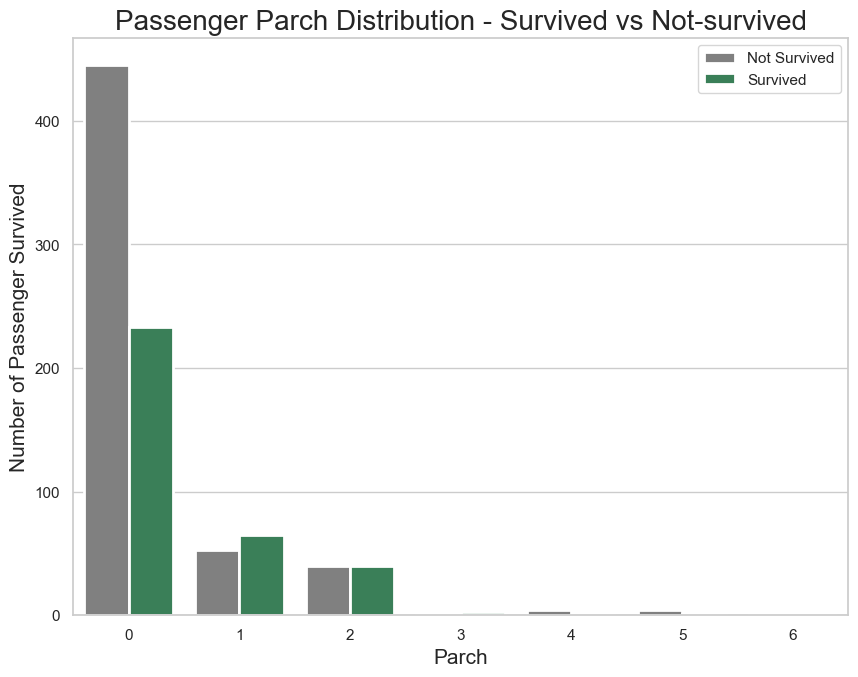

In [31]:
figure, myaxis = plt.subplots(figsize=(10, 7.5))

sns.countplot(x = "Parch", 
                   hue="Survived",
                   data = train, 
                   linewidth=2, 
                   palette = {1:"seagreen", 0:"gray"}, ax = myaxis)


## Fixing title, xlabel and ylabel
myaxis.set_title("Passenger Parch Distribution - Survived vs Not-survived", fontsize = 20)
myaxis.set_xlabel("Parch", fontsize = 15);
myaxis.set_ylabel("Number of Passenger Survived", fontsize = 15)
myaxis.legend(["Not Survived", "Survived"], loc = 'upper right')

In [32]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [33]:
print_percentage(train,'SibSp',[0,1,2,3,4,5,8])

0 survival rate: 0.345
1 survival rate: 0.536
2 survival rate: 0.464
3 survival rate: 0.250
4 survival rate: 0.167
5 survival rate: 0.000
8 survival rate: 0.000


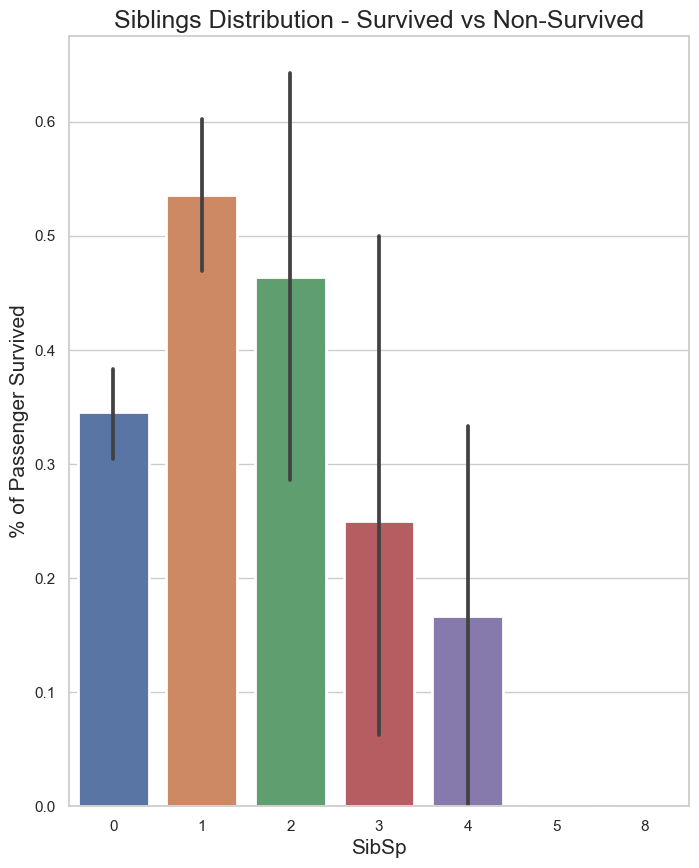

In [34]:
figure, parch_bar = plt.subplots(figsize = (8,10))
sns.barplot(x = "SibSp", 
            y = "Survived", 
            estimator = np.mean,
            data=train, 
            ax = parch_bar,
            linewidth=2)
parch_bar.set_title("Siblings Distribution - Survived vs Non-Survived", fontsize = 18)
parch_bar.set_xlabel("SibSp", fontsize = 15);
parch_bar.set_ylabel("% of Passenger Survived", fontsize = 15);

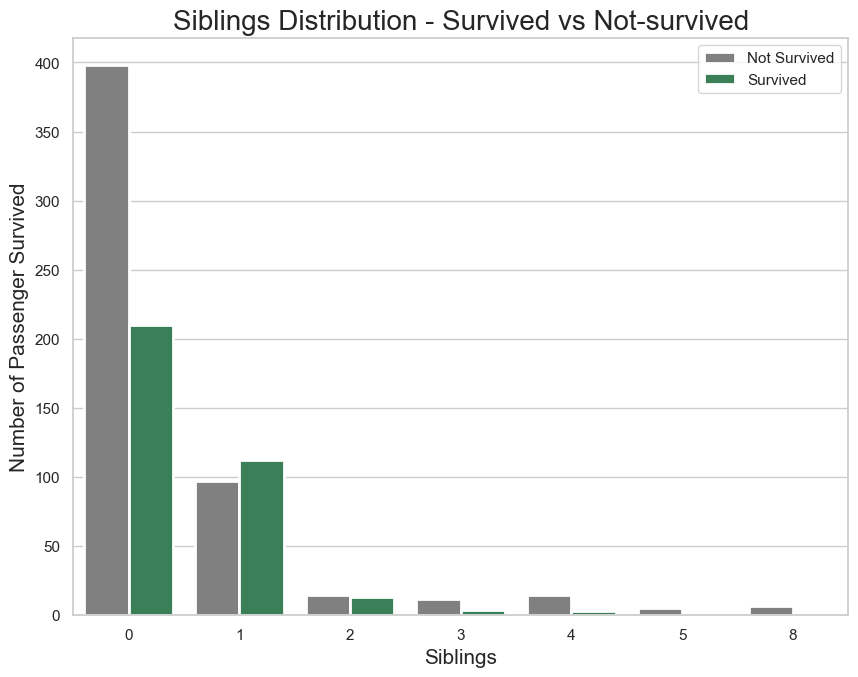

In [35]:
figure, myaxis = plt.subplots(figsize=(10, 7.5))

sns.countplot(x = "SibSp", 
                   hue="Survived",
                   data = train, 
                   linewidth=2, 
                   palette = {1:"seagreen", 0:"gray"}, ax = myaxis)


## Fixing title, xlabel and ylabel
myaxis.set_title("Siblings Distribution - Survived vs Not-survived", fontsize = 20)
myaxis.set_xlabel("Siblings", fontsize = 15);
myaxis.set_ylabel("Number of Passenger Survived", fontsize = 15)
myaxis.legend(["Not Survived", "Survived"], loc = 'upper right')

we will investigate the continous features like age and fare

first, known ages only

C:\Users\islam mahrous\AppData\Local\Temp\ipykernel_9008\3678693902.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(preimputation)


<Axes: xlabel='Age', ylabel='Density'>

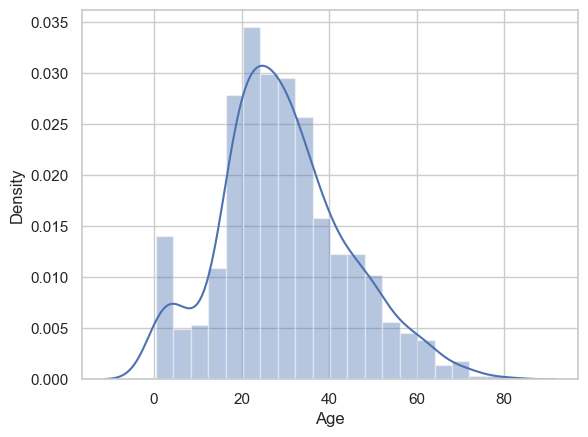

In [36]:
known_ages = pd.notnull(train.Age)
preimputation = train.Age[known_ages]
sns.distplot(preimputation)

whole age data plot

C:\Users\islam mahrous\AppData\Local\Temp\ipykernel_9008\147352238.py:2: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=train["Age"], kernel='gau', ax=myaxis, color="Red", fill=True, legend=True)


<Axes: xlabel='Age', ylabel='Density'>

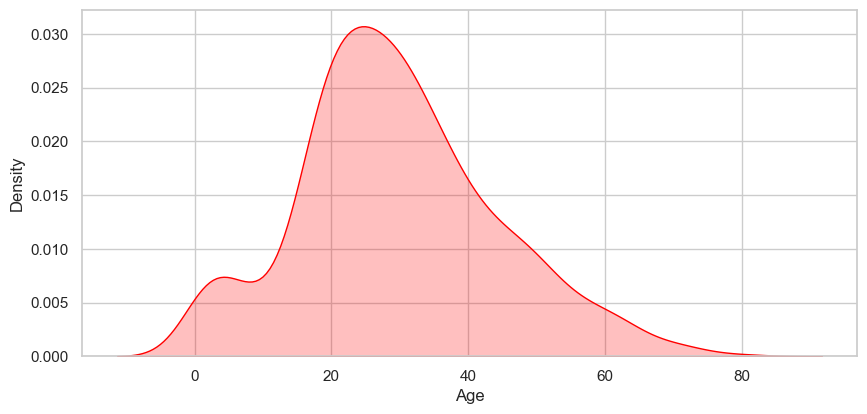

In [37]:
figure, myaxis = plt.subplots(figsize=(10, 4.5))
sns.kdeplot(data=train["Age"], kernel='gau', ax=myaxis, color="Red", fill=True, legend=True)

C:\Users\islam mahrous\AppData\Local\Temp\ipykernel_9008\4040715594.py:3: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=train["Age"][(train["Survived"] == 0) & (
C:\Users\islam mahrous\AppData\Local\Temp\ipykernel_9008\4040715594.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=train["Age"][(train["Survived"] == 0) & (
C:\Users\islam mahrous\AppData\Local\Temp\ipykernel_9008\4040715594.py:6: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=train["Age"][(train["Survived"] == 1) & (
C:\Users\islam mahrous\AppData\Local\Temp\ipykernel_9008\4040715594.py:6: FutureWarning: 

`shade` is now deprecated in fav

Text(0.5, 1.0, 'Superimposed KDE plot for age of Survived and Not Survived')

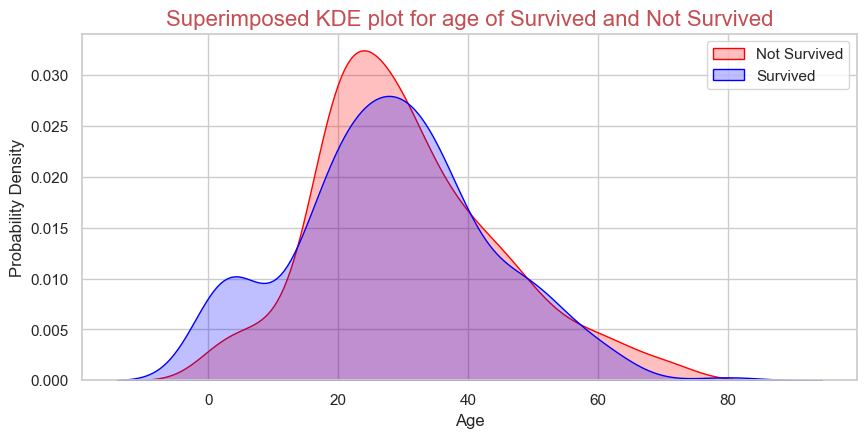

In [38]:
figure, myaxis = plt.subplots(figsize=(10, 4.5))

sns.kdeplot(data=train["Age"][(train["Survived"] == 0) & (
    train["Age"].notnull())], kernel='gau', ax=myaxis, color="Red", shade=True, legend=True)

sns.kdeplot(data=train["Age"][(train["Survived"] == 1) & (
    train["Age"].notnull())], kernel='gau', ax=myaxis, color="Blue", shade=True, legend=True)

myaxis.set_xlabel("Age")
myaxis.set_ylabel("Probability Density")
myaxis.legend(["Not Survived", "Survived"], loc='upper right')
myaxis.set_title("Superimposed KDE plot for age of Survived and Not Survived",
                 loc='center', fontdict={'fontsize': 16}, color='r')

investigating fare distribution

C:\Users\islam mahrous\AppData\Local\Temp\ipykernel_9008\1380426171.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(preimputation)


<Axes: xlabel='Fare', ylabel='Density'>

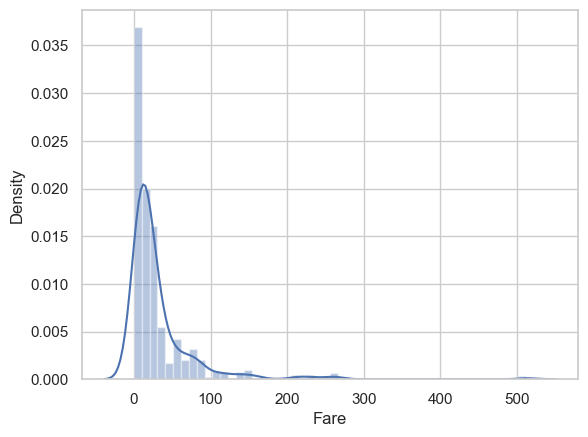

In [39]:
known_fare = pd.notnull(train.Fare)
preimputation = train.Fare[known_fare]
sns.distplot(preimputation)

C:\Users\islam mahrous\AppData\Local\Temp\ipykernel_9008\2698176872.py:2: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=train["Fare"], kernel='gau', ax=myaxis, color="Red", fill=True, legend=True)


<Axes: xlabel='Fare', ylabel='Density'>

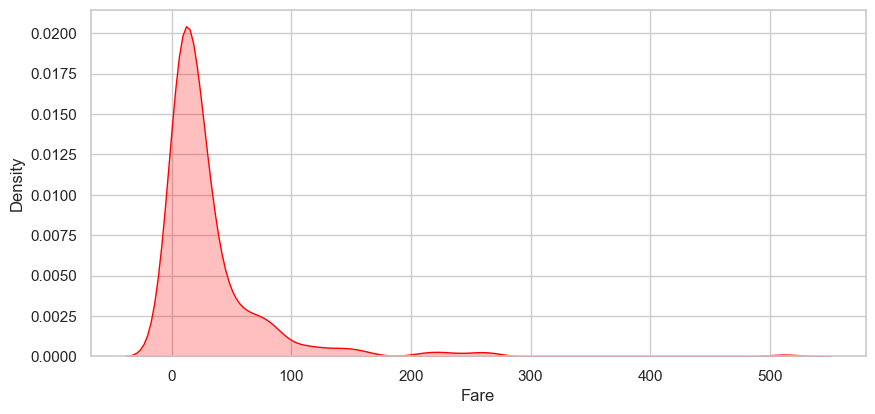

In [40]:
figure, myaxis = plt.subplots(figsize=(10, 4.5))
sns.kdeplot(data=train["Fare"], kernel='gau', ax=myaxis, color="Red", fill=True, legend=True)

C:\Users\islam mahrous\AppData\Local\Temp\ipykernel_9008\858744694.py:3: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=train.loc[(train['Survived'] == 0),'Fare'], kernel='gau', ax=fare, color="Red", shade=True, legend=True)
C:\Users\islam mahrous\AppData\Local\Temp\ipykernel_9008\858744694.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=train.loc[(train['Survived'] == 0),'Fare'], kernel='gau', ax=fare, color="Red", shade=True, legend=True)
C:\Users\islam mahrous\AppData\Local\Temp\ipykernel_9008\858744694.py:5: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=train.loc[(train['Survived'] == 1),'Fare']

Text(0.5, 1.0, 'Superimposed KDE plot for Fare of Survived and Not Survived')

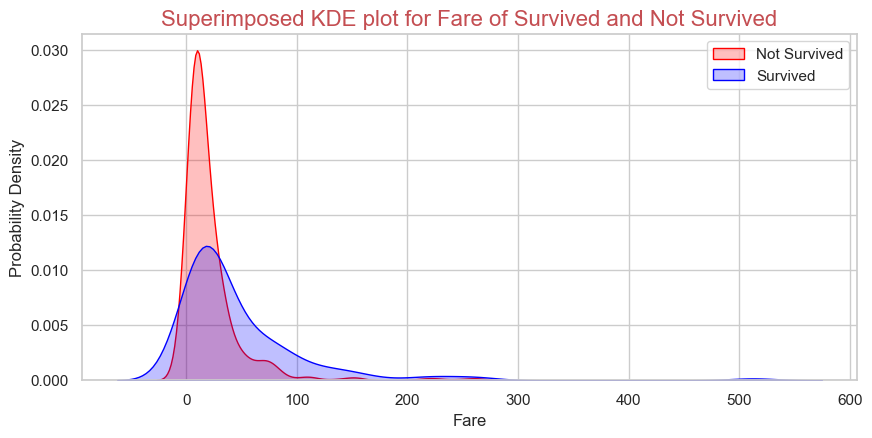

In [41]:
figure, fare = plt.subplots(figsize=(10, 4.5))

sns.kdeplot(data=train.loc[(train['Survived'] == 0),'Fare'], kernel='gau', ax=fare, color="Red", shade=True, legend=True)

sns.kdeplot(data=train.loc[(train['Survived'] == 1),'Fare'], kernel='gau', ax=fare, color="Blue", shade=True, legend=True)

fare.set_xlabel("Fare")
fare.set_ylabel("Probability Density")
fare.legend(["Not Survived", "Survived"], loc='upper right')
fare.set_title("Superimposed KDE plot for Fare of Survived and Not Survived",
                 loc='center', fontdict={'fontsize': 16}, color='r')

observing heatmap

C:\Users\islam mahrous\AppData\Local\Temp\ipykernel_9008\2591994919.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True, linewidths=0.5, fmt='.2f',ax=ax)


(7.0, 0.0)

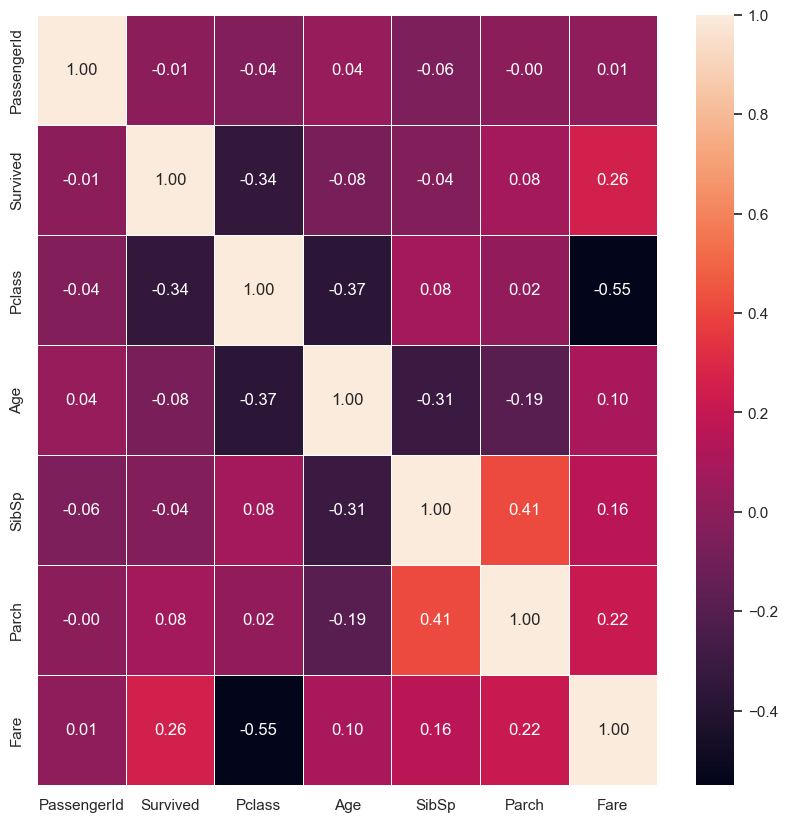

In [42]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(train.corr(), annot=True, linewidths=0.5, fmt='.2f',ax=ax)
ax.set_ylim(7, 0)

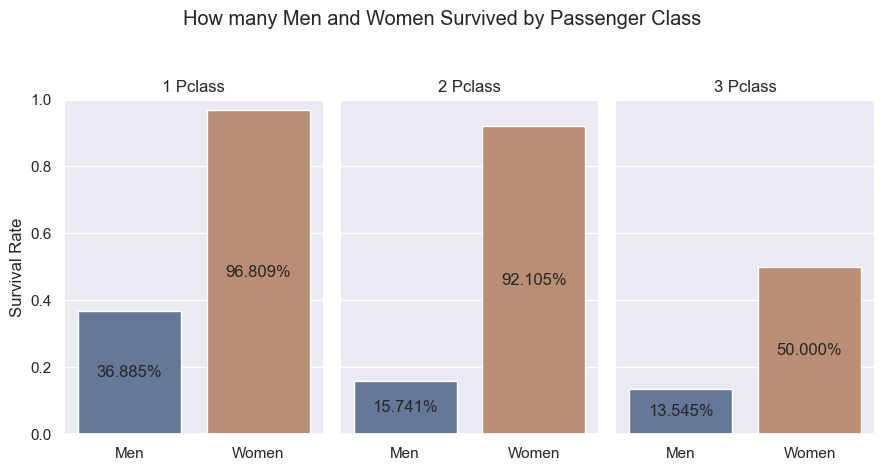

In [43]:
sns.set(font_scale=1)
g = sns.catplot(x="Sex", y="Survived", col="Pclass",
                    data=train, saturation=.5,
                    kind="bar", errorbar=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
    .set_xticklabels(["Men", "Women"])
    .set_titles("{col_name} {col_var}")
    .set(ylim=(0, 1))
    .despine(left=True))  
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How many Men and Women Survived by Passenger Class');

for myaxis in g.axes[0]:
    for patch in myaxis.patches:
        label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
        label_y = patch.get_y() + patch.get_height()/2
        myaxis.text(label_x, label_y,
                    #left - freq below - rel freq wrt population as a percentage
                    '{:.3%}'.format(patch.get_height()),
                   horizontalalignment='center', verticalalignment='center')


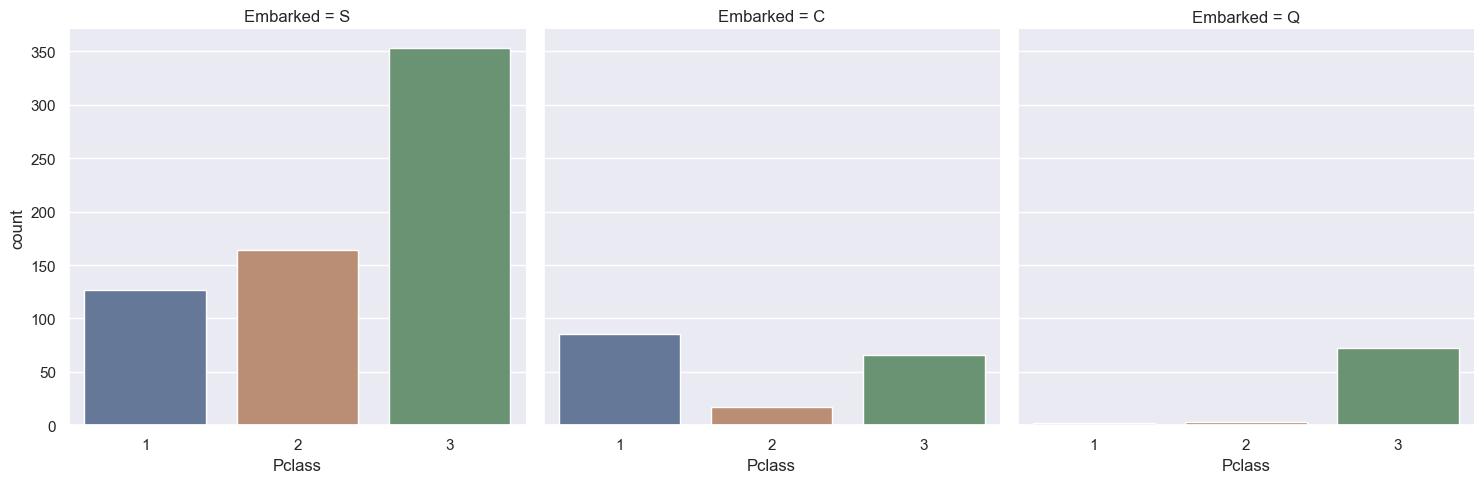

In [44]:
sns.set(font_scale=1)
g = sns.catplot(x="Pclass", col="Embarked",
                    data=train, saturation=.5,
                    kind="count", ci=None)

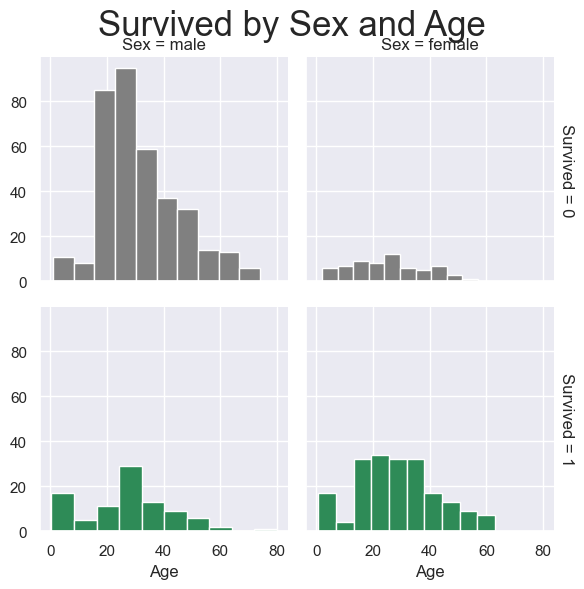

In [45]:
pal = {1:"seagreen", 0:"gray"}
g = sns.FacetGrid(train, col="Sex", row="Survived", margin_titles=True, hue = "Survived",
                  palette=pal)
g = g.map(plt.hist, "Age", edgecolor = 'white');
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

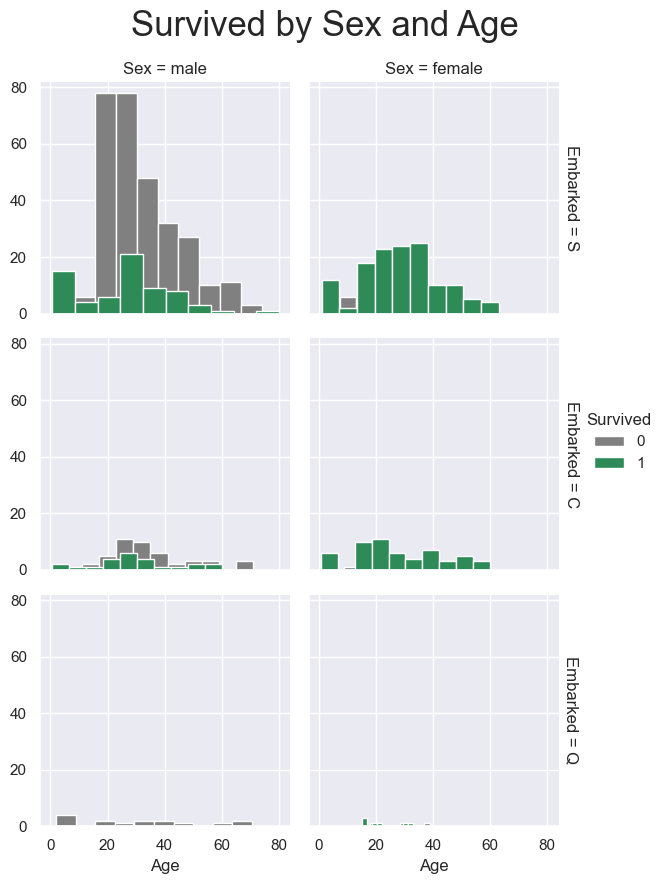

In [46]:
g = sns.FacetGrid(train, col="Sex", row="Embarked", margin_titles=True, hue = "Survived",
                  palette = pal
                  )
g = g.map(plt.hist, "Age", edgecolor = 'white').add_legend();
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

Feature Engineering

Dealing with missing data

In [47]:
# Check variable Fare for missing values:
print('Amount of missing data in Fare for training set:', train.Fare.isnull().sum())
print('Amount of missing data in Fare for test set:', test.Fare.isnull().sum())

Amount of missing data in Fare for training set: 0
Amount of missing data in Fare for test set: 1


In [48]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


we will impute the missing Fare value with the median of the passenger with the same Pclass and Parch as per heatmap conclusion

In [49]:
median_fare = test.groupby(['Pclass', 'Parch']).Fare.median()[3][0]

In [50]:
test['Fare'] = test['Fare'].fillna(median_fare)

In [51]:
# Check variable Embarked for missing values:
print('Amount of missing data in Embarked for training set:', train.Embarked.isnull().sum())
print('Amount of missing data in Embarked for test set:', test.Embarked.isnull().sum())

Amount of missing data in Embarked for training set: 2
Amount of missing data in Embarked for test set: 0


In [52]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [53]:
# the two passenger most probably embarked from Southhampton as the passengers fron the same Pclass boarded from the same city
train['Embarked'] = train['Embarked'].fillna('S')

In [54]:
# Check variable Age for missing values:
# isnull() will give the same result as isna()
# after making a copy of the missing age rows, isnull() wont work. better, use isna()
print('Amount of missing data in Age for training set:', train.Age.isna().sum())
print('Amount of missing data in Age for test set:', test.Age.isna().sum())

Amount of missing data in Age for training set: 177
Amount of missing data in Age for test set: 86


In [55]:
train[train['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [56]:
train_copy = train.copy()
missing_age_rows = train_copy.Age.isna()
missing_age_rows
# the result of the above comment. false means the age is available and true means the age is missing.

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [57]:
age_by_pclass_SibSp = train_copy.groupby(['Pclass', 'SibSp']).median()['Age']
age_by_pclass_SibSp

C:\Users\islam mahrous\AppData\Local\Temp\ipykernel_9008\4205905584.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age_by_pclass_SibSp = train_copy.groupby(['Pclass', 'SibSp']).median()['Age']


Pclass  SibSp
1       0        37.0
        1        38.0
        2        44.0
        3        23.0
2       0        30.0
        1        29.0
        2        23.5
        3        30.0
3       0        26.0
        1        25.0
        2        19.5
        3         6.0
        4         6.5
        5        11.0
        8         NaN
Name: Age, dtype: float64

In [58]:
# as there is no median for Pclass=3 and SibSP=8 group, we shall assign the nearest median, that of Pclass=3 and SibSp=5.
age_by_pclass_SibSp[3][8] = age_by_pclass_SibSp[3][5]
# the above command doesnt change in the train data itself.

In [59]:
age_by_pclass_SibSp

Pclass  SibSp
1       0        37.0
        1        38.0
        2        44.0
        3        23.0
2       0        30.0
        1        29.0
        2        23.5
        3        30.0
3       0        26.0
        1        25.0
        2        19.5
        3         6.0
        4         6.5
        5        11.0
        8        11.0
Name: Age, dtype: float64

In [60]:
train_copy['Age'] = train_copy.groupby(['Pclass', 'SibSp'])['Age'].apply(lambda x: x.fillna(x.median()))
train_copy['Age'] = train_copy.Age.fillna(11) 

C:\Users\islam mahrous\AppData\Local\Temp\ipykernel_9008\2011608254.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  train_copy['Age'] = train_copy.groupby(['Pclass', 'SibSp'])['Age'].apply(lambda x: x.fillna(x.median()))


In [61]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


C:\Users\islam mahrous\AppData\Local\Temp\ipykernel_9008\1385058363.py:4: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  preimputation=sns.kdeplot(data=train["Age"][(train["Survived"] == 0) & (
C:\Users\islam mahrous\AppData\Local\Temp\ipykernel_9008\1385058363.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  preimputation=sns.kdeplot(data=train["Age"][(train["Survived"] == 0) & (
C:\Users\islam mahrous\AppData\Local\Temp\ipykernel_9008\1385058363.py:6: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  afterimputation=sns.kdeplot(data=train_copy["Age"][(train_copy["Survived"] == 0) & (
C:\Users\islam mahrous\AppData\Local\Temp\ipykernel_9008\1385058363.p

Text(0.5, 1.0, 'Superimposed KDE plot for age of not survived: pre-imputation vs after-imputation')

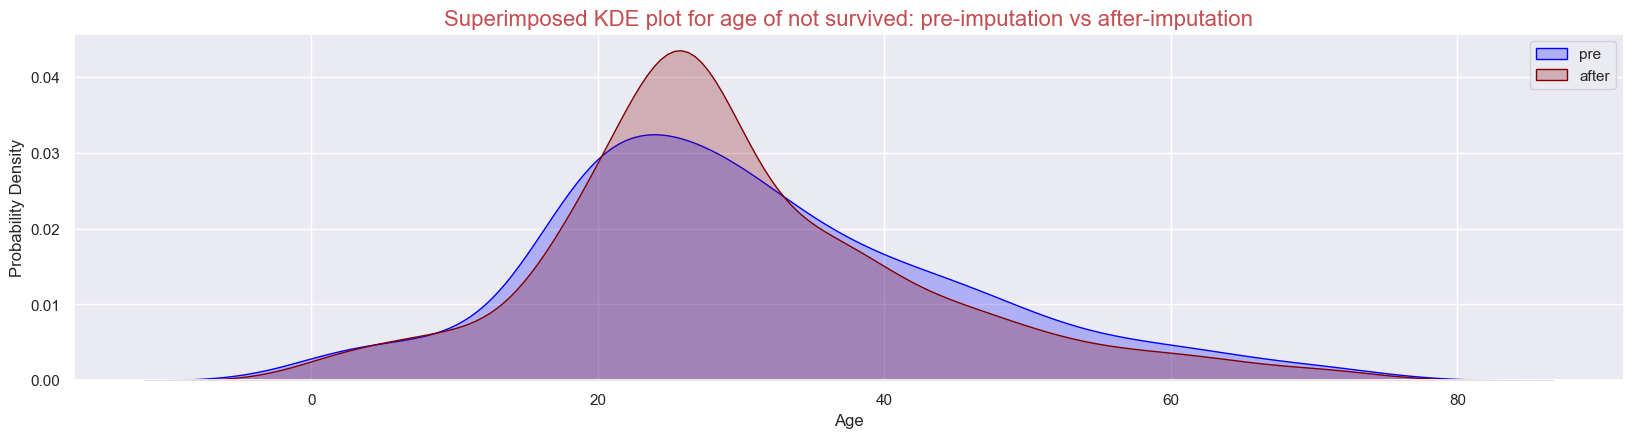

In [62]:
# checking hte distribution of those who didnt survive before and after imputation
figure, myaxis = plt.subplots(figsize=(20, 4.5))

preimputation=sns.kdeplot(data=train["Age"][(train["Survived"] == 0) & (
    train["Age"].notnull())], kernel='gau', ax=myaxis, color="Blue", shade=True, legend=True)
afterimputation=sns.kdeplot(data=train_copy["Age"][(train_copy["Survived"] == 0) & (
    train_copy["Age"].notnull())], kernel='gau', ax=myaxis, color="maroon", shade=True, legend=True)
myaxis.set_xlabel("Age")
myaxis.set_ylabel("Probability Density")
myaxis.legend(["pre", "after"], loc='upper right')
myaxis.set_title("Superimposed KDE plot for age of not survived: pre-imputation vs after-imputation",
                 loc='center', fontdict={'fontsize': 16}, color='r')


C:\Users\islam mahrous\AppData\Local\Temp\ipykernel_9008\4187843012.py:4: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  preimputation=sns.kdeplot(data=train["Age"][(train["Survived"] == 1) & (
C:\Users\islam mahrous\AppData\Local\Temp\ipykernel_9008\4187843012.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  preimputation=sns.kdeplot(data=train["Age"][(train["Survived"] == 1) & (
C:\Users\islam mahrous\AppData\Local\Temp\ipykernel_9008\4187843012.py:6: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  afterimputation=sns.kdeplot(data=train_copy["Age"][(train_copy["Survived"] == 1) & (
C:\Users\islam mahrous\AppData\Local\Temp\ipykernel_9008\4187843012.p

Text(0.5, 1.0, 'Superimposed KDE plot for age of survived: pre-imputation vs after-imputation')

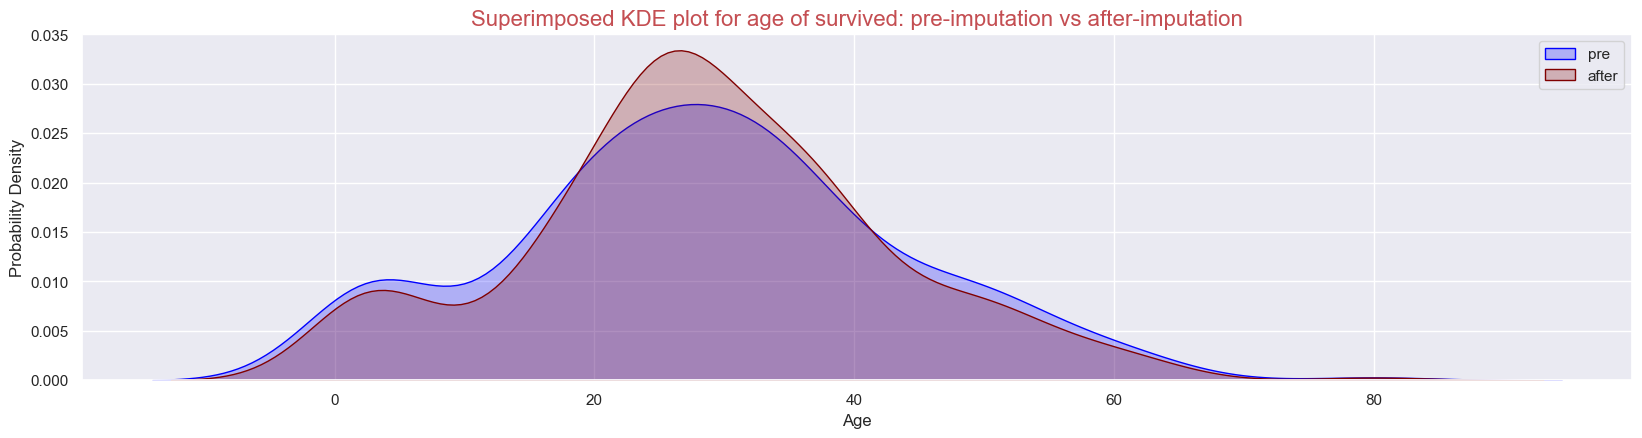

In [63]:
# checking hte distribution of those who survived before and after imputation
figure, myaxis = plt.subplots(figsize=(20, 4.5))

preimputation=sns.kdeplot(data=train["Age"][(train["Survived"] == 1) & (
    train["Age"].notnull())], kernel='gau', ax=myaxis, color="Blue", shade=True, legend=True)
afterimputation=sns.kdeplot(data=train_copy["Age"][(train_copy["Survived"] == 1) & (
    train_copy["Age"].notnull())], kernel='gau', ax=myaxis, color="maroon", shade=True, legend=True)

myaxis.set_xlabel("Age")
myaxis.set_ylabel("Probability Density")
myaxis.legend(["pre", "after"], loc='upper right')
myaxis.set_title("Superimposed KDE plot for age of survived: pre-imputation vs after-imputation",
                 loc='center', fontdict={'fontsize': 16}, color='r')

In [64]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [65]:
# Age feature need imputation as well
test_copy = test.copy()
test_age_by_pclass_SibSp = test_copy.groupby(['Pclass', 'SibSp']).median()['Age']
test_age_by_pclass_SibSp

C:\Users\islam mahrous\AppData\Local\Temp\ipykernel_9008\192204347.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  test_age_by_pclass_SibSp = test_copy.groupby(['Pclass', 'SibSp']).median()['Age']


Pclass  SibSp
1       0        39.0
        1        46.0
        2        55.0
        3        28.0
2       0        27.0
        1        29.0
        2        21.0
3       0        24.0
        1        20.0
        2        19.5
        3        29.0
        4        11.5
        5        10.0
        8        14.5
Name: Age, dtype: float64

In [66]:
test_copy['Age'] = test_copy.groupby(['Pclass', 'SibSp'])['Age'].apply(lambda x: x.fillna(x.median()))
test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


C:\Users\islam mahrous\AppData\Local\Temp\ipykernel_9008\230152390.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  test_copy['Age'] = test_copy.groupby(['Pclass', 'SibSp'])['Age'].apply(lambda x: x.fillna(x.median()))


In [67]:
# Assigning the testing data frames to the originals
train = train_copy
test = test_copy

In [68]:
# performing feature selection
print('Number of Unique values for Name is', len(train.Name.unique()))
print('Number of Unique values for PassengerID is', len(train.PassengerId.unique()))
print('Number of Unique values for Fare is', len(train.Fare.unique()))
print('Number of Unique values for Survived is', len(train.Survived.unique()))
print('Number of Unique values for Pclass is', len(train.Pclass.unique()))
print('Number of Unique values for Parch is', len(train.Parch.unique()))
print('Number of Unique values for SibSp is', len(train.SibSp.unique()))
print('Number of Unique values for Embarked is', len(train.Embarked.unique()))
print('Number of Unique values for Cabin is', len(train.Cabin.unique()))
print('Number of Unique values for Sex is', len(train.Sex.unique()))
print('Number of Unique values for Ticket is', len(train.Ticket.unique()))

Number of Unique values for Name is 891
Number of Unique values for PassengerID is 891
Number of Unique values for Fare is 248
Number of Unique values for Survived is 2
Number of Unique values for Pclass is 3
Number of Unique values for Parch is 7
Number of Unique values for SibSp is 7
Number of Unique values for Embarked is 3
Number of Unique values for Cabin is 148
Number of Unique values for Sex is 2
Number of Unique values for Ticket is 681


In [69]:
# passengerID is unique per passenger. so, it can be dropped
train.drop(["PassengerId"],inplace=True,axis=1)
test.drop(["PassengerId"],inplace=True,axis=1)

In [70]:
# Ticket should be removed as well
train.drop(["Ticket"],inplace=True,axis=1)
test.drop(["Ticket"],inplace=True,axis=1)

In [71]:
train.Name.head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [72]:
# separating Name elements into new name, title, and family name
def name_sep(data):
    families=[]
    titles = []
    new_name = []
    #for each row in dataset:
    for i in range(len(data)):
        name = data.iloc[i]
        # extract name inside brakets into name_bracket:
        if '(' in name:
            name_no_bracket = name.split('(')[0] 
        else:
            name_no_bracket = name
            
        family = name_no_bracket.split(",")[0]
        title = name_no_bracket.split(",")[1].strip().split(" ")[0]
        
        #remove punctuations accept brackets:
        for c in string.punctuation:
            name = name.replace(c,"").strip()
            family = family.replace(c,"").strip()
            title = title.replace(c,"").strip()
            
        families.append(family)
        titles.append(title)
        new_name.append(name)
            
    return families, titles, new_name

In [73]:
train['Surname'], train['Title'], train['Newname']  = name_sep(train.Name)
test['Surname'], test['Title'], test['Newname'] = name_sep(test.Name)

In [74]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Surname,Title,Newname
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Braund,Mr,Braund Mr Owen Harris
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Cumings,Mrs,Cumings Mrs John Bradley Florence Briggs Thayer
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Heikkinen,Miss,Heikkinen Miss Laina
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Futrelle,Mrs,Futrelle Mrs Jacques Heath Lily May Peel
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Allen,Mr,Allen Mr William Henry


In [75]:
train.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
the           1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [76]:
# removing the titles with one item
train['Title'] = train['Title'].replace(['Ms', 'Mlle'],'Miss')
train['Title'] = train['Title'].replace(['Mme'],'Mrs')
train['Title'] = train['Title'].replace(['Dr','Rev','the','Jonkheer','Lady','Sir', 'Don'],'Nobles')
train['Title'] = train['Title'].replace(['Major','Col', 'Capt'],'Navy')

In [77]:
train.Title.value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Nobles     18
Navy        5
Name: Title, dtype: int64

<Axes: xlabel='Title', ylabel='Survived'>

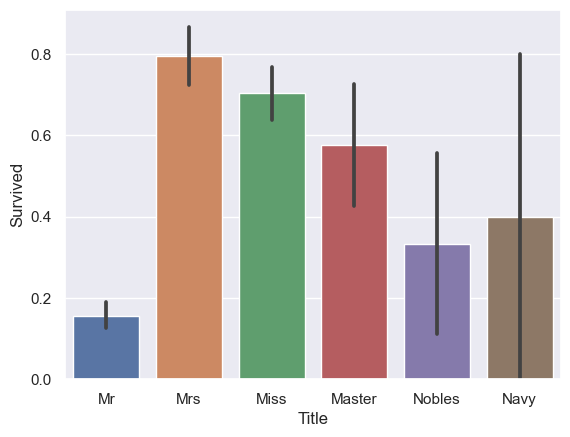

In [78]:
sns.barplot(x = 'Title', y = 'Survived', data = train)

In [79]:
nobles_survival = train[train.Title == "Nobles"].groupby(['Sex']).Survived.value_counts()
nobles_survival

Sex     Survived
female  1            3
male    0           12
        1            3
Name: Survived, dtype: int64

In [80]:
test.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [81]:
test['Title'] = test['Title'].replace(['Ms','Dona'],'Miss')
test['Title'] = test['Title'].replace(['Dr','Rev'],'Nobles')
test['Title'] = test['Title'].replace(['Col'],'Navy')
test.Title.value_counts()

Mr        240
Miss       80
Mrs        72
Master     21
Nobles      3
Navy        2
Name: Title, dtype: int64

In [82]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [83]:
# processing cabin feature
def cabin_sep(data_cabin):
    cabin_type = []

    for i in range(len(data_cabin)):

            if data_cabin.isnull()[i] == True: 
                cabin_type.append('M') #missing cabin = M 
            else:    
                cabin = data_cabin[i]
                cabin_type.append(cabin[:1]) 
            
    return cabin_type

In [85]:
train['cabin_type'] = cabin_sep(train.Cabin)
test['cabin_type'] = cabin_sep(test.Cabin)

In [88]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Surname,Title,Newname,cabin_type
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Braund,Mr,Braund Mr Owen Harris,M
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Cumings,Mrs,Cumings Mrs John Bradley Florence Briggs Thayer,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Heikkinen,Miss,Heikkinen Miss Laina,M
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Futrelle,Mrs,Futrelle Mrs Jacques Heath Lily May Peel,C
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Allen,Mr,Allen Mr William Henry,M


In [89]:
idx = train[train['Cabin'] == 'T'].index
train.loc[idx, 'Cabin'] = 'A'

In [90]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [91]:
# dealing with the categorical data
train_categorical_features = ['Pclass', 'Sex','Title','Cabin', 'Embarked']

# No need to use sklearn's encoders
# pandas has a pandas.get_dummies() function that takes in a series
#     and returns a HOT encoded dataframe of that series
#     use the add_prefix() method of dataframe to add the feature name in front of the category name
#     then join the dataframe sideways (similar to pd.concat([train, dummies], axis=1))
for feature in train_categorical_features:
    dummies = pd.get_dummies(train[feature]).add_prefix(feature + '_')
    train = train.join(dummies)
    
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,...,0,0,0,0,0,0,0,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,...,0,0,0,0,0,0,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,...,0,0,0,0,0,0,0,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,...,0,0,0,0,0,0,0,0,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S,...,0,0,0,0,0,0,0,0,0,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S,...,0,0,0,0,0,0,0,0,0,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,23.4500,NaN,S,...,0,0,0,0,0,0,0,0,0,1
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C,...,0,0,0,0,0,0,0,1,0,0


In [92]:
test_categorical_features = ['Pclass', 'Sex','Title', 'Cabin', 'Embarked']

# No need to use sklearn's encoders
# pandas has a pandas.get_dummies() function that takes in a series
#     and returns a HOT encoded dataframe of that series
#     use the add_prefix() method of dataframe to add the feature name in front of the category name
#     then join the dataframe sideways (similar to pd.concat([train, dummies], axis=1))
for feature in test_categorical_features:
    dummies = pd.get_dummies(test[feature]).add_prefix(feature + '_')
    test = test.join(dummies)
    
test

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Surname,...,Cabin_F E46,Cabin_F E57,Cabin_F G63,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Embarked_C,Embarked_Q,Embarked_S
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q,Kelly,...,0,0,0,0,0,0,0,0,1,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S,Wilkes,...,0,0,0,0,0,0,0,0,0,1
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q,Myles,...,0,0,0,0,0,0,0,0,1,0
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S,Wirz,...,0,0,0,0,0,0,0,0,0,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S,Hirvonen,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,24.0,0,0,8.0500,NaN,S,Spector,...,0,0,0,0,0,0,0,0,0,1
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C105,C,Oliva y Ocana,...,0,0,0,0,0,0,0,1,0,0
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,NaN,S,Saether,...,0,0,0,0,0,0,0,0,0,1
416,3,"Ware, Mr. Frederick",male,24.0,0,0,8.0500,NaN,S,Ware,...,0,0,0,0,0,0,0,0,0,1
